## Making the graphs

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
## plot the errors by the methods with a heatmap 
# first get the data
def make_graphs(df, save_data):
  metric_cols = ['NX_NVI','NX_NMI','NX_RAND_IDX','IG_NVI','IG_NMI','IG_RAND_IDX']
  by_method = df.groupby(['METHOD']).mean()[metric_cols]
  by_fn = df.groupby(['FILE_NAME']).mean()[metric_cols]
  by_method_fn = df.groupby(['METHOD','FILE_NAME']).mean()[metric_cols]
  by_nodes = df.groupby(['NUM_NODES']).mean()[metric_cols]
  ## plot the data
  import seaborn as sns 
  ## heatmap with a cmap from green (low values) to red (high values)
  ax = sns.heatmap(by_method, cmap='rocket_r',cbar=True, annot=True, fmt=".2f")
  plt.xlabel('Metrics')
  plt.title("Mean of the metrics by method")
  plt.savefig(save_data+"mean_metrics_method.png" ,bbox_inches='tight')
  plt.show()
  ax = sns.heatmap(by_fn, cmap='rocket_r',cbar=True, annot=True, fmt=".2f")
  plt.xlabel('Metrics')
  plt.title("Mean of the metrics by file")
  plt.savefig(save_data+"mean_metrics_file.png" ,bbox_inches='tight')
  plt.show()
  axs = sns.heatmap(by_method_fn, cmap='rocket_r',cbar=True, annot=True, fmt=".2f")
  plt.xlabel('Metrics')
  plt.title("Mean of the metrics by method and file")
  plt.savefig(save_data+"mean_metrics_method_and_file.png" ,bbox_inches='tight')
  plt.show()
  axs = sns.heatmap(by_nodes, cmap='rocket_r',cbar=True, annot=True, fmt=".2f")
  plt.xlabel('Metrics')
  plt.title("Mean of the metrics by number of nodes")
  plt.savefig(save_data+"mean_metrics_nodes.png" ,bbox_inches='tight')
  plt.show()
  by_method.plot(kind='bar')
  plt.savefig(save_data+"bar_mean_metrics_nodes.png" ,bbox_inches='tight')
  plt.show()
  by_fn.plot(kind='bar')
  plt.savefig(save_data+"_bar_mean_metrics_nodes.png" ,bbox_inches='tight')
  plt.show()

In [4]:
CURR_DIR = "./"
## DATA: CSV FILES 
toy_data = CURR_DIR + "data/model_metrics/toy.csv"
model_data = CURR_DIR + "data/model_metrics/model.csv"
real_data = CURR_DIR + "data/model_metrics/real.csv"
all_data = CURR_DIR + "data/model_metrics/all_models.csv"
## SAVE DATA: PLOTS 
toy_save_data = CURR_DIR + "data/model_metrics/toy/"
model_save_data = CURR_DIR + "data/model_metrics/model/"
real_save_data = CURR_DIR + "data/model_metrics/real/"

In [ ]:
## USE THESE IF USING GOOGLE DRIVE 
toy_data = './drive/MyDrive/Cursos/3_Community_detection/data/model_metrics/toy.csv'
model_data = './drive/MyDrive/Cursos/3_Community_detection/data/model_metrics/model.csv'
real_data = './drive/MyDrive/Cursos/3_Community_detection/data/model_metrics/real.csv'
all_data = './drive/MyDrive/Cursos/3_Community_detection/data/model_metrics/all_models.csv'
## save paths for images 
toy_save_data = './drive/MyDrive/Cursos/3_Community_detection/data/model_metrics/toy/'
model_save_data = './drive/MyDrive/Cursos/3_Community_detection/data/model_metrics/model/'
real_save_data = './drive/MyDrive/Cursos/3_Community_detection/data/model_metrics/real/'
main_save_dir = './drive/MyDrive/Cursos/3_Community_detection/data/model_metrics/'


In [5]:

## dataframes 
df_toy = pd.read_csv(toy_data, index_col=0)
df_model = pd.read_csv(model_data, index_col=0)
df_real = pd.read_csv(real_data, index_col=0)
df_all = pd.read_csv(all_data, index_col=0)

In [ ]:
df_all.head()

In [32]:
## NX & IG METRICS
nx_metric_cols = ['NX_NVI','NX_NMI','NX_RAND_IDX']
ig_metric_cols = ['IG_NVI','IG_NMI','IG_RAND_IDX']
metric_cols = nx_metric_cols + ig_metric_cols
## filter the dataframe 
a = df_all.groupby(['MODEL_TYPE','METHOD']).mean()[nx_metric_cols]#.reset_index().drop(['MODEL_TYPE','METHOD'],axis=1)
b = df_all.groupby(['MODEL_TYPE','METHOD']).mean()[ig_metric_cols]#.reset_index().drop(['MODEL_TYPE','METHOD'],axis=1)
## make a new dataframe 
new_cols = ["MODEL_TYPE","METHOD",'DIFF_NVI', 'DIFF_NMI', 'DIFF_RAND_IDX']
df = pd.DataFrame(columns=new_cols)
df['MODEL_TYPE'] = a.reset_index()['MODEL_TYPE']
df['METHOD'] = a.reset_index()['METHOD']
## calculate the difference 
diff = abs((b.values - a.values))
## fill the values 
df[['DIFF_NVI','DIFF_NMI','DIFF_RAND_IDX']] = diff
df.to_csv("./data/model_metrics/diff_metrics.csv")

<AxesSubplot:ylabel='METHOD'>

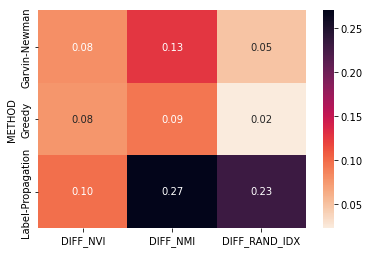

In [11]:
## AVERAGE OF BOTH
## make a new dataframe 
new_cols = ["MODEL_TYPE","METHOD",'AVG_NVI','AVG_NMI','AVG_RAND_IDX']
df = pd.DataFrame(columns=new_cols)
df['MODEL_TYPE'] = a.reset_index()['MODEL_TYPE']
df['METHOD'] = a.reset_index()['METHOD']
## calculate the difference 
import numpy as np 
import pandas as pd 
avg = (b.values + a.values) / 2
## fill the values 
df[['AVG_NVI','AVG_NMI','AVG_RAND_IDX']] = avg
df.to_csv("./data/model_metrics/avg_metrics.csv")

What can we see from our results: 
We can observe a fluctuation of the metrics by the methods, as shown in the graphs belo (heatmap_avg, heatmap_diff, barplot_avg).
The graph above shows the absolute difference between NetworkX and iGraph results for each of the metrics. We see that for NVI, across all the 3 methods there is a consistent difference (0.08 - 0.10), between the result of each of the methods. Moreover, for the NMI, we can see that there is a larger difference between the modules with the Label Propagation. It is seen that the difference (0.27) is the largest amongst all metrics. This can be attributed that Label Propagation is a stochastic process, in which each node is given a random unique label at the beginning, which is constant throughout the entire algorithm. Since within the parameters of this model, a random seed can be given, it makes sense that the values fluctuate. More experimental results would be needed (multiple iterations) in order to determine whether this value stabilizes at the given range. Lastly, the rand score is the one that is the largest for Label Propagation and has the difference amongst the methods. This can be seen that the other methods Greedy and Girvan-Newman, do not depend on stochastic processes and probably use a very similar implementation, such that their results are very close. 


The bar plot below shows which method has the highest difference for each of the metrics. We can clearly see that stochastic processes such as Label Propagation would result in a higher inaccuracy between different models. This can be further optimized and reduced by using consistent random seeds during the testing environment as well as increasing the number of trials to have an average. On the other hand, we see that the Greedy Modularity Maximization algorithm is the one that performs the best in this area, such that it has the smallest difference between all the methods & metrics. 

Moreover, we can also talk about how the metrics perform on different types of which model it is applied to. For this we can show 

df_all.groupby(['NUM_NODES'])[ig_metric_cols].mean().plot(kind='bar')

Which shows the metrics per number of nodes, or the complexity of it. We can see that there is no real pattern in how the metrics perform, as there are some where the NVI does not prove to be a good metric since no result is obtained. On the other hand we can see that NMI and Rand Index, are robust ones which are able to be used across varying network sizes. This can be attributed to how they are calculated, as they are based of the Confusion Matrix (Rand Index ) and NMI from the shared information between two clusters. 



In [ ]:
%% NMI between 0 (no mutual information) and 1 (perfect correlation).
%% NVI distance measure between to disjoint sets subset of A. 
%% RAND_IDX measure of similarity between two clusters  ~~ Accuracy 

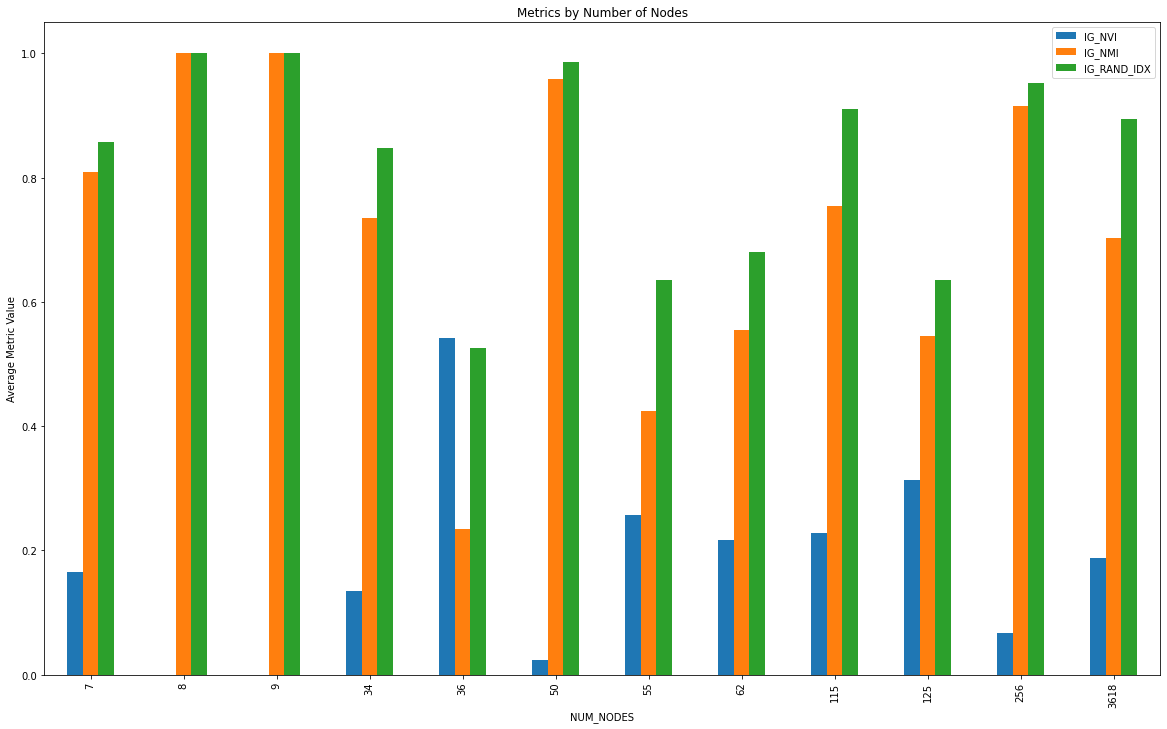

In [53]:
df_all.groupby(['NUM_NODES'])[ig_metric_cols].mean().plot(kind='bar',title='Metrics by Number of Nodes',
                                                          ylabel='Average Metric Value',
                                                          figsize=(20,12))
plt.savefig("./data/model_metrics/metrics_by_nodes.png")
plt.show()

<AxesSubplot:ylabel='NUM_NODES'>

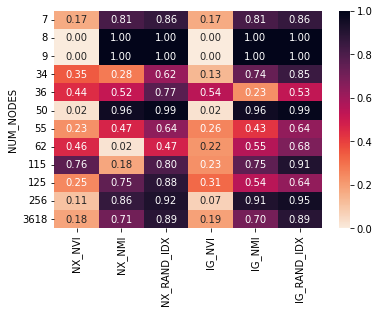

In [41]:
sns.heatmap(df_all.groupby(['NUM_NODES'])[metric_cols].mean(), cmap='rocket_r',cbar=True, annot=True, fmt=".2f")

<AxesSubplot:title={'center':'Metrics by Method'}, xlabel='METHOD', ylabel='Average Metric Value'>

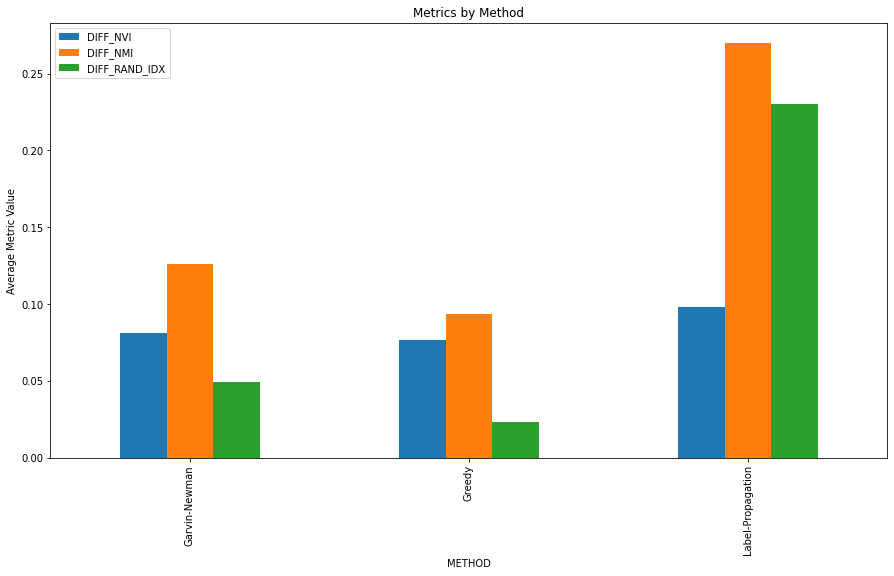

In [56]:
df.groupby(['METHOD']).mean().plot(kind='bar', title='Metrics by Method',
                                   ylabel='Average Metric Value',
                                   figsize=(15,8))

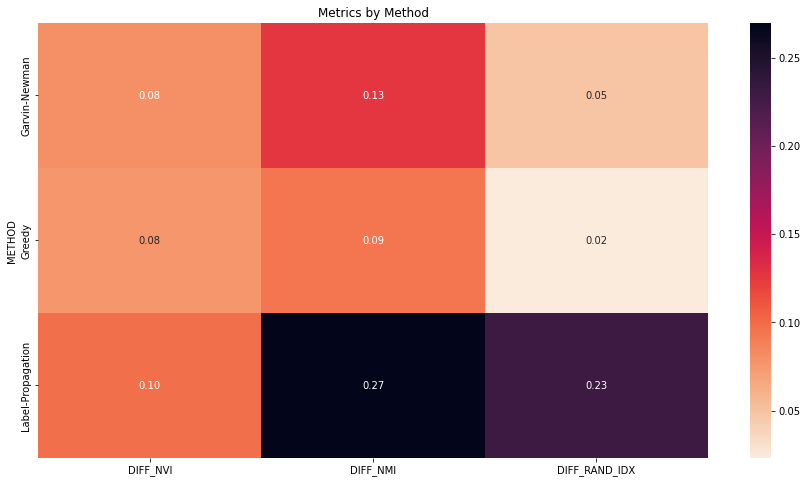

In [60]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
g = sns.heatmap(df.groupby(['METHOD']).mean(), cmap='rocket_r',cbar=True, annot=True, fmt=".2f")
g.set_title("Metrics by Method")
plt.savefig("./data/model_metrics/heatmap_difference_metrics_by_method.png")
plt.show()


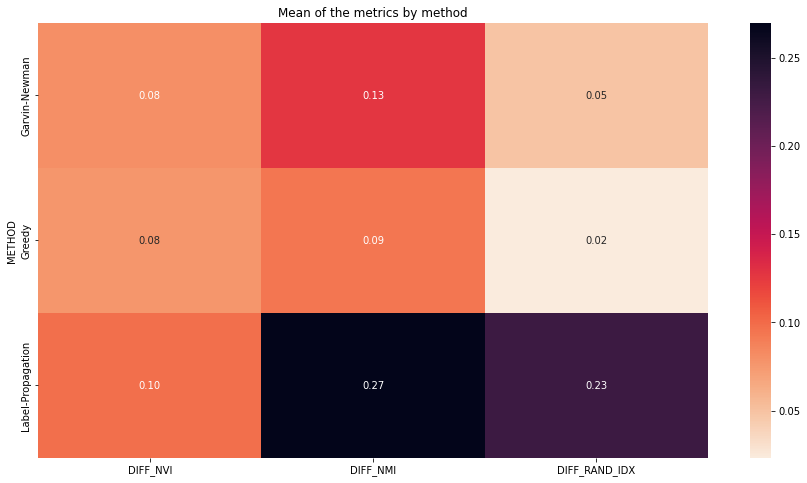

In [62]:
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
g = df.groupby(['METHOD']).mean()
ax = sns.heatmap(g, cmap='rocket_r',cbar=True, annot=True, fmt=".2f")
plt.title("Mean of the metrics by method")
plt.savefig("./data/model_metrics/heatmap_mean_metrics_by_method.png")
plt.show()

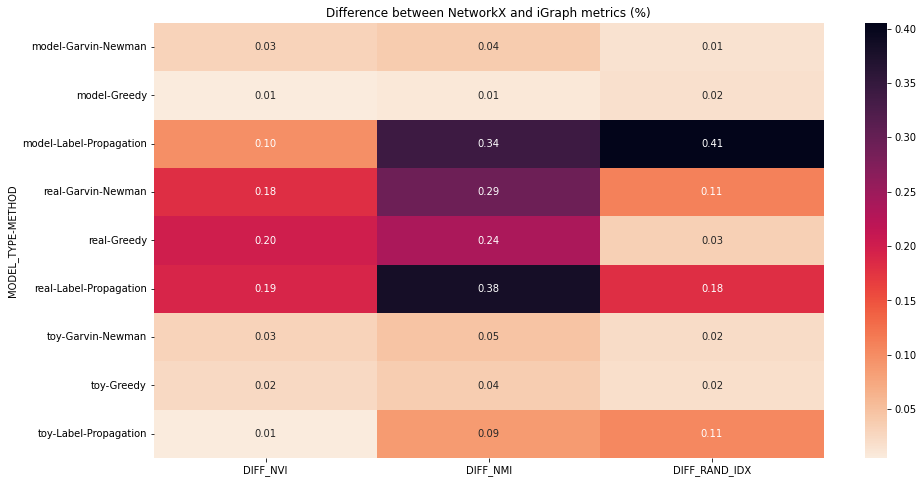

In [66]:
## plot
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
g = df.groupby(['MODEL_TYPE','METHOD']).mean()
ax = sns.heatmap(g, cmap='rocket_r',cbar=True, annot=True, fmt=".2f")
ax.set_title("Difference between NetworkX and iGraph metrics (%)")
plt.show()

In [ ]:
df_all.groupby(['MODEL_TYPE']).mean()[metric_cols].plot(kind='bar')

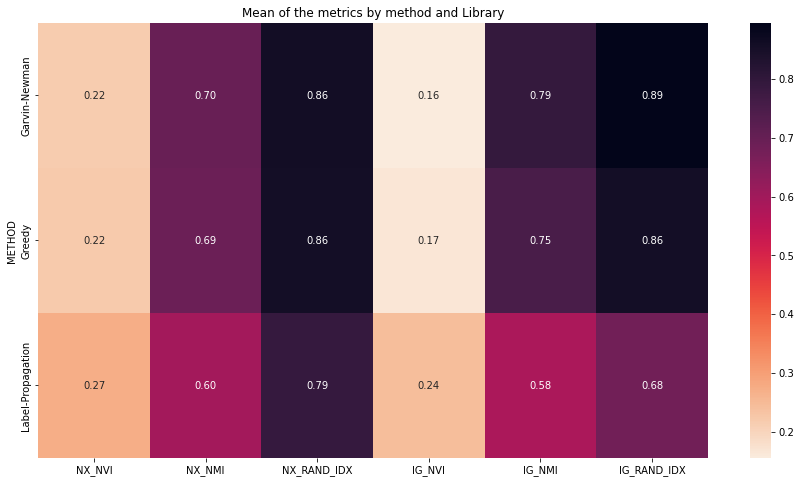

In [65]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
aa = df_all.groupby(['METHOD']).mean()[metric_cols]
ax = sns.heatmap(aa, cmap='rocket_r',cbar=True, annot=True, fmt=".2f")
plt.title("Mean of the metrics by method and Library")
plt.savefig("./data/model_metrics/heatmap_mean_metrics_by_method_and_library.png")
plt.show()

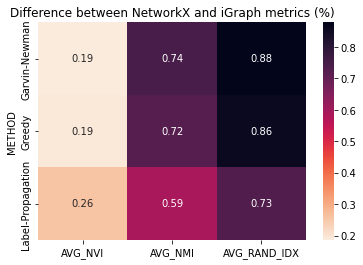

In [19]:
g = df.groupby(['METHOD']).mean()
ax = sns.heatmap(g, cmap='rocket_r',cbar=True, annot=True, fmt=".2f")
ax.set_title("Difference between NetworkX and iGraph metrics (%)")
plt.show()

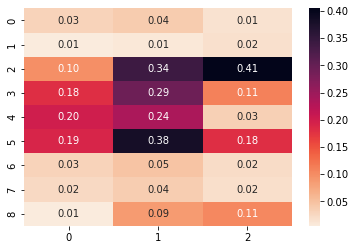

In [20]:
import seaborn as sns 
ax = sns.heatmap(diff, cmap='rocket_r',cbar=True, annot=True, fmt=".2f")
plt.show()

In [ ]:
a.values - b.values 

In [ ]:
## see a heatmap by the different models 

In [ ]:
make_graphs(df_all, main_save_dir)

In [ ]:
make_graphs(df_toy, toy_save_data)

In [ ]:
make_graphs(df_model, model_save_data)

In [ ]:
make_graphs(df_real, real_save_data)

In [ ]:
metric_cols = ['NX_NVI','NX_NMI','NX_RAND_IDX','IG_NVI','IG_NMI','IG_RAND_IDX']
df_all.groupby(['MODEL_TYPE','METHOD']).mean()[metric_cols].plot(kind='bar',title='Model Type & Method by Metrics')

In [ ]:
from pylab import rcParams
import seaborn as sns
rcParams['figure.figsize'] = (20,12)
g = df_all.groupby(['MODEL_TYPE']).mean()[metric_cols]
ax = sns.heatmap(g, annot=True)
plt.show()
ax.set_title("All Models & Metrics")
ax.set_xlabel("Metric")
plt.savefig(main_save_dir+"_heatmap_all_modeltype_metrics.png")

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = (20,12)
g = df_all.groupby(['MODEL_TYPE']).mean()[metric_cols].plot(kind='bar')
#ax = sns.heatmap(g, annot=True)
plt.title("All Models & Metrics")
plt.xlabel("Metric")
plt.savefig(main_save_dir+"_barall_modeltype_metrics.png")